## 1.Introduction
This dataset is showing records of over 16k video games that made over 100k copies from 1980 to 2020 and its sales in North America, Europe, Japan...

This notebook is aimed at exploring, getting an overview of the dataset followed by cleaning & visualizations to answer business problems:

 <b>1.1. Identify the most popular game, genre, publisher and platform of all time.
 
 1.2. Identify the most popular game in each region.
 
 1.3. Identify the trend of video games from 1980-2020.</b>


## 2.Data Cleaning

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv(r'C:\Users\Acer\Desktop\PortfolioData\PythonProject\VideoGameSales\VideoGameSales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Checking data types
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [4]:
# Checking for missing data
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
# Shows percentage of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) # Select rows whose column value is null
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Rank - 0%
Name - 0%
Platform - 0%
Year - 2%
Genre - 0%
Publisher - 0%
NA_Sales - 0%
EU_Sales - 0%
JP_Sales - 0%
Other_Sales - 0%
Global_Sales - 0%


Because the amout of missing data in Year and Publisher is small. So i delete all the rows with missing data in Year and Publisher columns.

In [6]:
df = df.dropna()

In [8]:
# Check for duplication in values 
sum(df.duplicated())

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


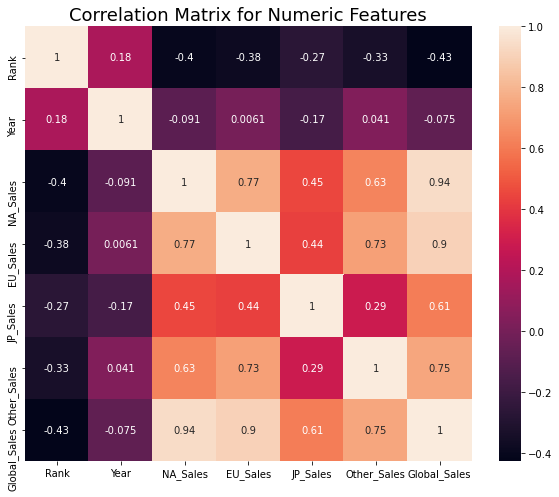

In [10]:
# Shows Correlation Matrix for Numeric Features

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True) # annot = True: write the data value in each cell

plt.title('Correlation Matrix for Numeric Features',fontsize=18)

plt.show() 

## 3. Busniness Problems

### 3.1. Identify the most popular game, genre, publisher and platform of all time.

In [11]:
# Identify the most popular game, genre, publisher and platform of all time
aspects = ['Name', 'Platform', 'Genre', 'Publisher']

for i in aspects: 
    a = df.groupby([i])['Global_Sales'].sum().sort_values(ascending=False).head(1)
    display(a)

Name
Wii Sports    82.74
Name: Global_Sales, dtype: float64

Platform
PS2    1233.46
Name: Global_Sales, dtype: float64

Genre
Action    1722.84
Name: Global_Sales, dtype: float64

Publisher
Nintendo    1784.43
Name: Global_Sales, dtype: float64

 ### In the world:
   
   - Game with highest sales is Wii Sports.
    
   - Platform with highest sales is PS2.
    
   - Genre with highest sales is Action.
    
   - Publisher with highest sales is Nintendo.

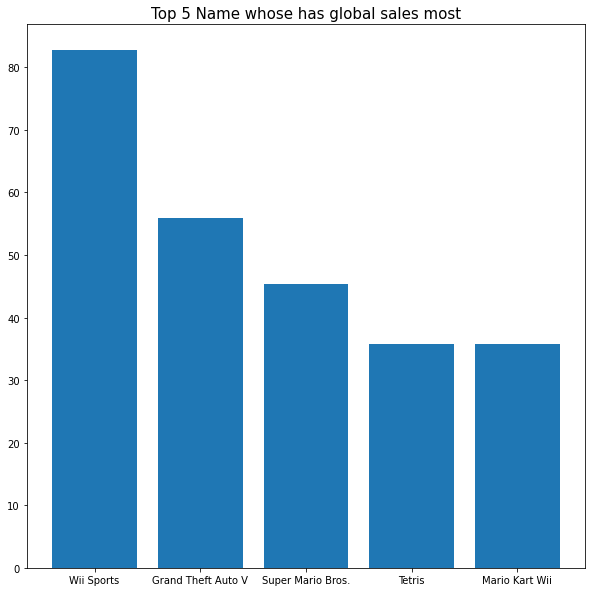

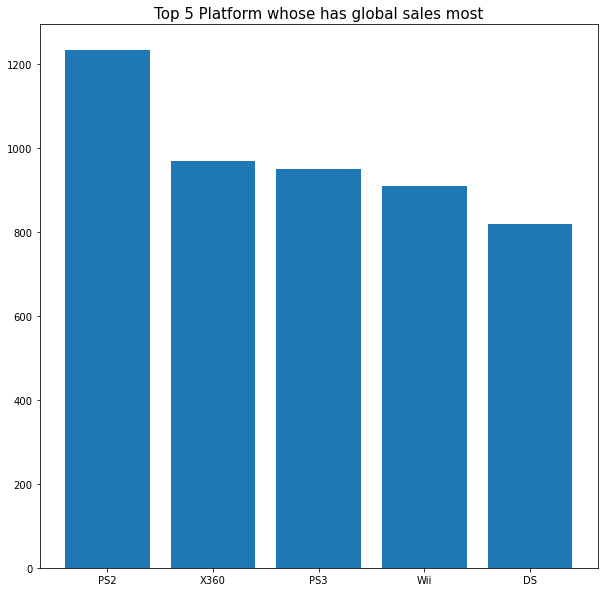

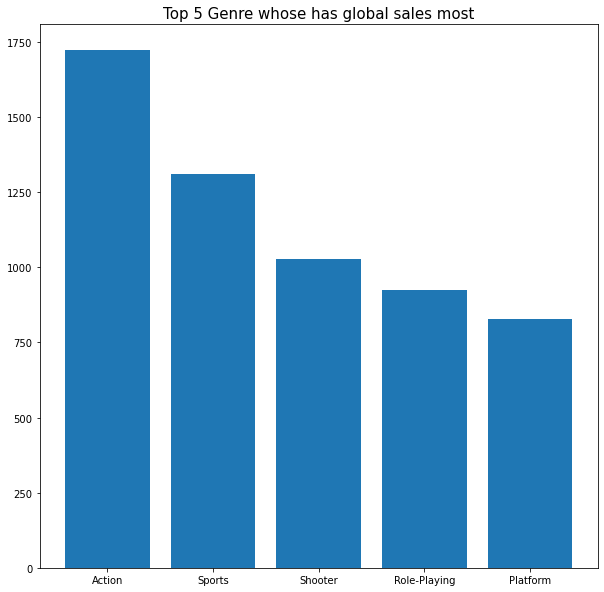

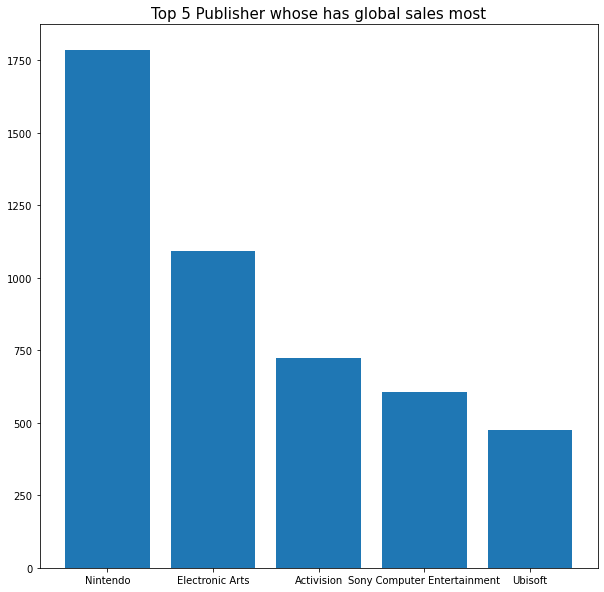

In [12]:
# Shows Top 5 Game, Platform, Genre, Publisher whose has global sales most

aspects = ['Name', 'Platform', 'Genre', 'Publisher']

for i in aspects: 
    a = df.groupby([i])['Global_Sales'].sum().sort_values(ascending=False).head(5)

    plt.figure(figsize=(10,10))
    plt.bar(a.index, a.values)
    plt.title(f'Top 5 {i} whose has global sales most',fontsize=15)

    plt.show()

In [13]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

### 3.2. Identify the most popular game, genre, publisher and platform in each region.

In [14]:
regionals = ['NA_Sales', 'EU_Sales', 'JP_Sales']
aspects = ['Name', 'Platform', 'Genre', 'Publisher']
for i in regionals:
    for j in aspects:
        k = df.groupby(j)[i].sum().sort_values(ascending=False).head(1)
        display(k)

Name
Wii Sports    41.49
Name: NA_Sales, dtype: float64

Platform
X360    594.33
Name: NA_Sales, dtype: float64

Genre
Action    861.77
Name: NA_Sales, dtype: float64

Publisher
Nintendo    815.75
Name: NA_Sales, dtype: float64

Name
Wii Sports    29.02
Name: EU_Sales, dtype: float64

Platform
PS3    340.47
Name: EU_Sales, dtype: float64

Genre
Action    516.48
Name: EU_Sales, dtype: float64

Publisher
Nintendo    418.3
Name: EU_Sales, dtype: float64

Name
Pokemon Red/Pokemon Blue    10.22
Name: JP_Sales, dtype: float64

Platform
DS    175.02
Name: JP_Sales, dtype: float64

Genre
Role-Playing    350.29
Name: JP_Sales, dtype: float64

Publisher
Nintendo    454.99
Name: JP_Sales, dtype: float64

### In North America:
   - Game with highest sales is Wii Sports.
   
   - Platform with highest sales is X360.
   
   - Genre with highest sales is Action.
   
   - Publisher with highest sales is Nintendo.
   
### In Europe:

   - Game with highest sales is Wii Sports.
   
   - Platform with highest sales is PS3.
   
   - Genre with highest sales is Action.
   
   - Publisher with highest sales is Nintendo.
   
### In Japan:

   - Game with highest sales is Pokemon Red/Pokemon Blue.
   
   - Platform with highest sales is DS.
   
   - Genre with highest sales is Role-Playing.
   
   - Publisher with highest sales is Nintendo.

<b>Nitendo</b> is sold highest in North America, Europe and Japan. In North America and Europe, <b>Wii Sports</b> and <b>Action</b> game are bestselling video games and bestselling game genres respectively , whereas in Japan, they are <b>Pokemon Red/Pokemon Blue</b> and  <b>Role-Playing</b>. Lastly, these regions are different in terms of <b>platform</b>.

In [15]:
# Shows Top 5 most popular game in North America, Europe and Japan 

for i in regionals: 
    display(df.sort_values(by=[i], ascending=False).head(5))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


### 3.3. Identify the trend of video games by global sales from 1980-2020.

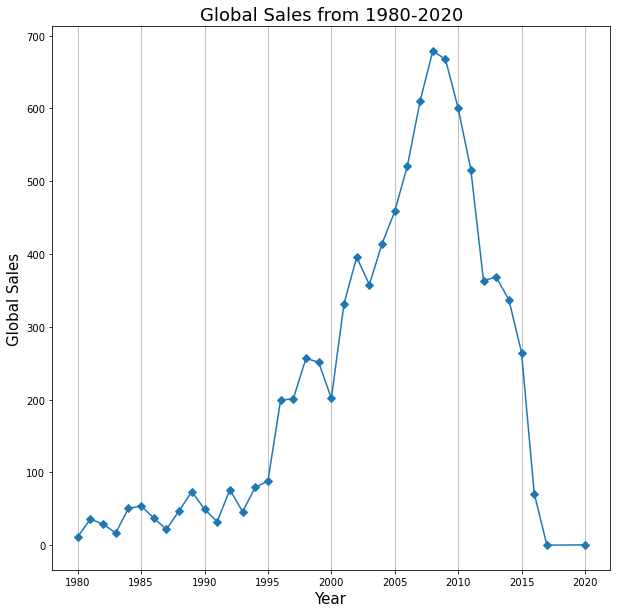

In [16]:
# Shows global sales from 1980-2020
b = df.groupby(df['Year'])['Global_Sales'].sum()

plt.figure(figsize=(10,10))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Global Sales',fontsize=15)
plt.title('Global Sales from 1980-2020',fontsize=18)
plt.plot(b.index, b, marker='D')
plt.grid(axis='x')

plt.show()

The sales of video games peaked at 2008-2009 and then tended to decrease.

In [ ]:
https://www.kaggle.com/harrimansaragih/video-games-analysis-for-beginner
https://www.kaggle.com/mahmoudatef94/communicate-data-findings-video-game-sales
    